# Investigating the Motion of a String Fixed at One End and Free at the Other End

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode
from scipy.optimize import curve_fit
from vpython import * #yes, I know I'm not supposed to do this
from scipy.linalg import eigh


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We will be looking at how a string moves when one end is attached to a wall and the other end is free to move about (i.e. not attached to a wall). We are first going to look at three masses connected to four springs. After understanding the mathematics behind how the program will work, we will generalize the solution to N number of masses and springs.

For three masses connected by four springs where the boundaries include 1 wal and 1 free end, the equations of motion for the displacement $u_i$ for each mass $m_i$ are:

$$m_1\ddot{u}_1 = -ku_1-k(u_1-u_2)=-2ku_1+ku_2$$

$$m_2\ddot{u}_2 = -k(u_2-u_1)-k(u_2-u_3)=ku_1-2ku_2+ku_3$$

$$m_3\ddot{u}_3 = -k(u_3-u_2)=ku_2-ku_3$$


We will assume the masses oscillate vertically. In this case $k=F_T/L_0$ where $F_T$ is the tension in the "string" and $L_0$ is the nominal distance between masses ("atoms").

Next we will assume that there is a set of initial conditions that results in motion where each mass oscillates with a frequency $\omega$ and the displacement of each mass $m_i$ is described by a single sinusoidal function:

$$u_i = a_i \cos(\omega t + \phi)$$

Substituting this into the differential equations above gives:

$$2ka_1-ka_2 + 0 = m_1\omega^2a_1$$

$$-ka_1+2ka_2 - ka_3 = m_2\omega^2a_2$$

$$0 -ka_2 + ka_3 = m_3\omega^2a_3$$


The next step involves rewriting the above equations into matrix form so we can then perform linear algebra on them and find a general solution

$$
\left[ {\begin{array}{ccc}
   2k & -k & 0 \\
   -k & 2k & -k \\
   0 & -k & k \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
  = \omega^2
\left[ {\begin{array}{ccc}
   m_1 & 0 & 0 \\
   0 & m_2 & 0 \\
   0 & 0 & m_3 \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$

Define $\lambda=\omega^2$, then

$$[A-\lambda B]\vec{a}$$

where $\lambda$ is called the eigenvalue and $\vec{a}$ is called the eigenvector. 



To find the frequencies, we will solve for the eigenvalues using

$$\det\left[ A-\lambda B\right]=0$$

$$\left | {\begin{array}{ccc}
   2k-\lambda m_1 & -k & 0 \\
   -k & 2k-\lambda m_2 & -k \\
   0 & -k & k-\lambda m_3 \\
  \end{array} } \right |$$
  
There are three eigenvalues, and we will substitute each eigenvalue back into the equations of motion above and solve for its corresponding eigenvector:

$$ \vec{a}=
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$


Now that we have the eigen values and vectors, we Write the general analytic solution for the triatomic molecule as a sum of the normal modes.

$$
\left[ {\begin{array}{c}
    u_1 \\
    u_2 \\
    u_3 \\
  \end{array} } \right]
  = A_0
\left[ {\begin{array}{c}
    a_{00} \\
    a_{10} \\
    a_{20} \\
  \end{array} } \right]
  \cos(\omega_0t + \phi_0)
+ A_1
\left[ {\begin{array}{c}
    a_{01} \\
    a_{11} \\
    a_{21} \\
  \end{array} } \right]
  \cos(\omega_1t + \phi_1)
+ A_2
\left[ {\begin{array}{c}
    a_{02} \\
    a_{12} \\
    a_{22} \\
  \end{array} } \right]
  \cos(\omega_1t + \phi_2)
$$

The constants $A_0,\ A_1,\ A_2, \phi_0,\ \phi_1,\ \phi_2$ depend on the initial conditions of the atoms.

First, let's set the initial velocities of all atoms to zero so the phases are zero.


Now, let's solve for $A_0,\ A_1,\ A_2$ based on the initial positions of the atoms. At $t=0$, 

$$u_1=u_{1i}=A_0a_{00} + A_1a_{01} + A_2a_{02}$$

$$u_2=u_{2i}=A_0a_{10} + A_1a_{11} + A_2a_{12}$$

$$u_3=u_{3i}=A_0a_{20} + A_1a_{21} + A_2a_{22}$$

We have three equations and three unknowns and, as mentioned earlier, we will use linear algebra to solve them.

$$
\left[ {\begin{array}{ccc}
   a_{00} & a_{01} & a_{02} \\
   a_{10} & a_{11} & a_{22} \\
   a_{20} & a_{21} & a_{22} \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    A_0 \\
    A_1 \\
    A_2 \\
  \end{array} } \right]
  = 
\left[ {\begin{array}{c}
    u_{1i} \\
    u_{2i} \\
    u_{3i} \\
  \end{array} } \right]
$$

## Define a Function that Calculates the Normal Modes

In [2]:
def normal_modes(Natoms, ks, mass, ui, udoti, t_total): 
    global N, k, m    #here we are making these variables global since we are defining them inside a function
    N=Natoms 
    k=ks
    m=mass
    
    #Build matrices
    A=np.zeros((Natoms,Natoms))

    for i in range(Natoms):
        A[i,i] = 2*ks
        if i==0:
            A[0,i+1]=-ks
        elif i==Natoms-1:
            A[i,i-1]=-ks
        else:
            A[i,i-1]=-ks
            A[i,i+1]=-ks
    
    A[Natoms-1,Natoms-1] = ks
            

    B=mass*np.identity(Natoms)

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B)        # eigenvalues and eigenvectors  
    #print("eigenvalues (omega^2):", lamb)
    #print("eigenvectors are column vectors in:\n\n", a)

    #Find coefficients for normal modes
    Acoeffs = np.linalg.solve(a,ui)

    #build the general solution
    t = np.linspace(0,t_total,1000)

    omegas = np.sqrt(lamb)
    u_atoms = np.zeros((Natoms,len(t)))

    for i in range(Natoms):
        for w in range(0,len(omegas)):
            u_atoms[i] = u_atoms[i] + Acoeffs[w]*a[i,w]*np.cos(omegas[w]*t)

    return omegas, a, u_atoms, t

## Define a Plot Function

In [3]:
def plot_mode_teq0(mode, freqs, vecs): #plot normal mode at t=0
    
    u_mode = vecs[:,mode]
    u_mode_with_boundary=np.insert(u_mode,0,0) #add 0 to beginning of array
#    u_mode_with_boundary=np.append(u_mode_with_boundary,0) #add 0 to end of array
    xa = np.linspace(0,L,Natoms+1)
        
    plt.figure()
    plt.title("normal mode %d" % mode)
    plt.plot(xa,u_mode_with_boundary, 'b-', label='u_i')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend(loc='lower right')
    plt.show()


## Calling the Normal Modes and Plot Function

Here we are calling the normal modes so that we can plot them and see what they look like. Since our the number of atoms we are using in our string is 50, we have 50 modes within our system. However, you can play around with the number of atoms and modes to see what the outcomes will be.

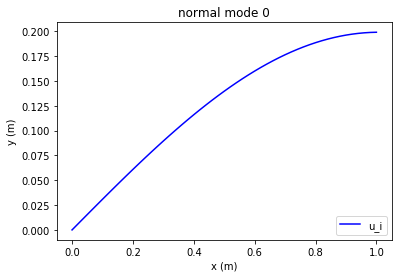

In [4]:
Natoms = 50
ks = 1
mass = 1
L = 1
L0 = L/(Natoms+1)
F_T = ks*L0
t_tot = 10*np.pi

u_i = np.zeros(Natoms)
udot_i = np.zeros(Natoms)

eig_freq, eig_vec, u, ta = normal_modes(Natoms, ks, mass, u_i, udot_i, t_tot)
plot_mode_teq0(0,eig_freq,eig_vec)

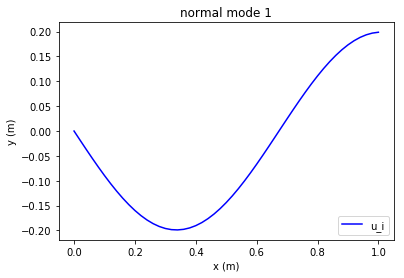

In [5]:
plot_mode_teq0(1,eig_freq,eig_vec)

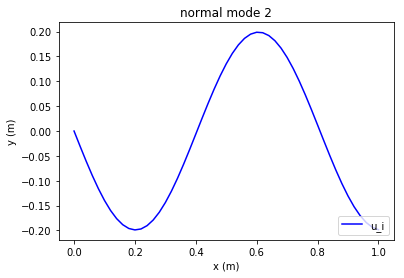

In [6]:
plot_mode_teq0(2,eig_freq,eig_vec)

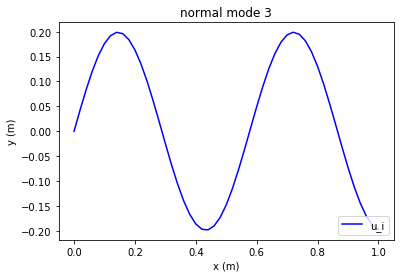

In [7]:
plot_mode_teq0(3,eig_freq,eig_vec)

## Create a Function to Animate the Mode using VPython

We are using VPython to create a function to animate the mode that we tell it to animate so we can actually see how that mode changes over time

In [8]:
def animate_mode(mode, freqs, vecs):
    scene=canvas()
    
    a = vecs[:,mode]
    omega = freqs[mode]
    
    scene.background=color.white
    
    balls=[]
    xballs = np.linspace(-L/2+L0,L/2-L0,Natoms)
    
    springs=[]
    xsprings = np.linspace(-L/2,L/2-L0,Natoms+1)
    springs.append(helix(pos=vec(-L/2,0,0), axis=vec(L0,0,0), color=color.orange, radius=L0/8))
    
    for x in xballs:
        ball = sphere(pos=vec(x,0,0), radius=L0/4, color=color.red)
        balls.append(ball)
        spring = helix(pos=ball.pos, axis=vec(L0,0,0), color=color.orange, radius=ball.radius/2)
        springs.append(spring)
        
    #set initial positions    
    for i in range(0,len(balls)):
        ball = balls[i]
        u_t = a[i]
        ball.pos.y = u_t
    for i in range(1, len(springs)-1): #all springs except first and last
        spring = springs[i]
        spring.pos=balls[i-1].pos
        spring.axis=balls[i].pos-spring.pos
    #update first and last springs
    springs[0].axis = balls[0].pos-springs[0].pos
    springs[-1].pos = balls[-1].pos
    springs[-1].axis = vec(L/2,0,0)-springs[-1].pos
    
    scene.waitfor("click")
    t=0
    dt=0.01

    while t<10*t_tot:
        rate(1000)
        for i in range(0,len(balls)):
            ball = balls[i]
            u_t = a[i]*np.cos(omega*t)
            ball.pos.y = u_t
        for i in range(1, len(springs)-1): #all springs except first and last
            spring = springs[i]
            spring.pos=balls[i-1].pos
            spring.axis=balls[i].pos-spring.pos
        #update first and last springs
        springs[0].axis = balls[0].pos-springs[0].pos
        springs[-1].pos = balls[-1].pos
        springs[-1].axis = vec(L/2,0,0)-springs[-1].pos

        t=t+dt
                

We will next call the animate function and once you run the following cell make sure to click in it so it will begin playing the animation.

In [9]:
animate_mode(1,eig_freq,eig_vec)

<IPython.core.display.Javascript object>

## Plucked String with 1 End Bound to Wall and the Other End is Free

We are now going to model a plucked string with 1 end bound to a wall and the other end is free. We will model this by using a triangle shape string so that the peak of the triangle represents the part of the string being pulled upwards.
We will first define the plot function and then create the string itself.

In [10]:
def plot_ui0(u_i): #plot normal mode at t=0
    
    u_with_boundary=np.insert(u_i,0,0) #add 0 to beginning of array
    u_with_boundary=np.append(u_with_boundary,0) #add 0 to end of array
    xa = np.linspace(0,L,Natoms+2)
        
    plt.figure()
    plt.title("u (t=0)")
    plt.plot(xa,u_with_boundary, 'b-', label='u')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend(loc='lower right')
    plt.show()

In [11]:
Natoms = 50
ks = 1
mass = 1
L = 1
L0 = L/(Natoms+1)
F_T = ks*L0
t_tot = 5*10*np.pi

xi_1=np.linspace(L0,L/2-L0,int(Natoms/2))
xi_2=np.linspace(L/2,L-L0,int(Natoms/2))
xi=np.append(xi_1,xi_2)

u_i_1 = 0.1/(L/2)*xi_1
u_i_2 = 0.1-0.1/(L/2)*(xi_2-L/2)
u_i = np.append(u_i_1,u_i_2)
udot_i = np.zeros(Natoms)

eig_freq, eig_vec, u, ta = normal_modes(Natoms, ks, mass, u_i, udot_i, t_tot)

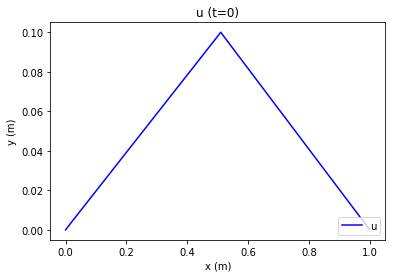

In [12]:
plot_ui0(u_i)

#### Animate the Plucked String
We will now use a package from mplEasyAnimate to animate our plucked string. 
Wha this animation function is doing is that it is plotting each time step of the function and then saving the grap to a file. Once each time step has been completed, the function then takes all of the images for each time step and compreses them and turns them into an mp4 video that you can play.

In [ ]:
from IPython.display import HTML

def playVideo(path):
    return HTML("""
                <video width="320" height="240" controls>
                  <source src="{}" type="video/mp4">
                </video>
                """.format(path))

In [ ]:
from mplEasyAnimate import animation
from tqdm import tqdm

In [ ]:
def easyanimate_string(t_array, u_array, filename):
    xa = np.linspace(L0,L-L0,Natoms)

    t_offsets = t_array
    anim = animation(filename)
    i=0
    for offset in tqdm(t_offsets):
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        ax.plot(xa, u_array[:,i])
        ax.set_xlim(0,L)
        ax.set_ylim(-0.11,0.11)
        
        anim.add_frame(fig)
        plt.close(fig)
        i=i+1
    anim.close()    

In [ ]:
file='string-triangle.mp4'
easyanimate_string(ta,u,file)

In [ ]:
playVideo(file)

## Using the Finite Difference Method (FDM) to show that a Gaussian Does Not Invert when one of the Ends are Free

With no external load, the displacement of a string at location $x$ and time $t$ is given by

$$F_T\frac{\partial u^2(x,t)}{\partial x^2}=\rho \frac{\partial u^2(x,t)}{\partial t^2}$$

where $F_T$ is the tension and $\rho$ is the linaer density $M/L$ of the string.  This can be written

$$\frac{\partial u^2(x,t)}{\partial x^2}= \frac{1}{v^2} \frac{\partial u^2(x,t)}{\partial t^2}$$

where $v=\sqrt{F_T/\rho}$.

Write each second derivative using FDM approximation. The second order approximation of the second partial derivative with respect to $x$ is

$$\frac{\partial u^2(x,t)}{\partial x^2} \approx \frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2}$$

The second order approximation of the second partial derivative with respect to $t$ is

$$\frac{\partial u^2(x,t)}{\partial t^2} \approx \frac{u(x,t+\Delta t)-2u(x,t)+u(x,t-\Delta t)}{\Delta t^2}$$

Use the subscript $m$ to indicate the $m^{th}$ index of the grid position $x_m$. Use the superscript $n$ to indicate the $n^{th}$ step in time. Then the wave equation is

$$\frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2} = \frac{1}{v^2} \frac{u(x,t+\Delta t)-2u(x,t)+u(x,t-\Delta t)}{\Delta t^2}$$

$$\frac{u_{m-1}^n-2u_{m}^n+u_{m+1}^n}{h^2} = \frac{1}{v^2} \frac{u_{m}^{n-1}-2u_{m}^n+u_{m}^{n+1}}{\Delta t^2} $$


The indices with $m$ represent grid points. The superscripts with $n$ are the evolution in time. The goal is to step forward in time. Thus, solve for $u_{m}^{n+1}$.

$$u_{m}^{n+1} = 2(1-\beta^2)u_m^n - u_m^{n-1} + \beta^2(u_{m-1}^n+u_{m+1}^n)$$

where $\beta=\frac{v\Delta t}{h}$. To evolve in time, we use two arrays to hold the solutions to $u(x)$ at all grid points at times $t_{n-1}$ and $t_n$, advance the solution to $t_{n+1}$ and store it in a third array, then swap the appropriate arrays to advance to $t_{n+2}$, and so on.

### We need to Define our Function to Compute the Displacement of Each "atom" for Each Timestep Using the Wave Equation and Finite Difference Method and then Our Gaussian Functions to be Used Later On

In [13]:
def wavemotion(u0, u1):
    u2 = 2*(1-b)*u1 - u0                     # unshifted terms 
    u2[1:-1] += b*( u1[0:-2] + u1[2:] )      # left, right 
    return u2

def gaussian(x):
    return np.exp(-(x-5)**2)                 # gaussian has x-5 bc it will cause it to peak at x=5


In [14]:
L, N = 10, 100           # length of string, number of intervals
b = 1.0                    # beta^2
h = L/N

t_total = 20
N_t = 200 #number of time intervals
dt = t_total/N_t
t = 0
ta = np.linspace(0,t_total,N_t+1)

x = np.linspace(0, L, N+1)
u0 = gaussian(x)
u1 = gaussian(x-b*h)  #giving it a velocity to the right

data = np.zeros((N_t+1,N+1))  #columns are u at grid points
data[0]=u0
data[1]=u1

for i in range(N_t):
    u2 = wavemotion(u0, u1)
    u2[-1] = u2[-2]         #here we are making the last particle on the right end equal to the particle before it to make it "free"
    u0, u1 = u1, u2
    data[i]=u2

data.shape


(201, 101)

We will use the EasyAnimate function to create a video of the gaussian wave to see if the gaussian inverts at the free end or not

In [ ]:
def easyanimate_string(t_array, u_array, filename):
    xa = np.linspace(0., L, N+1)

    t_offsets = t_array
    anim = animation(filename)
    i=0
    for offset in tqdm(t_offsets):
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        ax.plot(xa, u_array[i,:])
        ax.set_xlim(0,L)
        ax.set_ylim(-1.1,1.1)
        
        anim.add_frame(fig)
        plt.close(fig)
        i=i+1
    anim.close()    

In [ ]:
file='string-2.mp4'
easyanimate_string(ta,data,file)

In [ ]:
playVideo(file)

As you can see in the above video, the gaussian does not inverte at the free end, meaning we create the function correctly.